In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4

## World Ocean Atlas (WOA):

In [2]:
#Url to access the web:
url1 = 'https://www.ncei.noaa.gov/data/oceans/ncei/woa/oxygen/all/1.00/woa18_all_o00_01.nc'
#Url to access data: 
url2 = 'https://data.nodc.noaa.gov/thredds/dodsC/ncei/woa/oxygen/all/1.00/woa18_all_o00_01.nc'
ds = xr.open_dataset(url2, decode_times=False)

In [3]:
url_root = 'https://data.nodc.noaa.gov/thredds/dodsC/ncei/woa/oxygen/all/1.00/'
file_name = 'woa18_all_o00_01.nc'
ds = xr.open_dataset(url_root+file_name, 
                     decode_times=False)

In [4]:
for x in ds.variables.keys():
    if 'o_' in x:
        print(x, ds[x].long_name)

o_an Objectively analyzed mean fields for mole_concentration_of_dissolved_molecular_oxygen_in_sea_water at standard depth levels.
o_mn Average of all unflagged interpolated values at each standard depth level for mole_concentration_of_dissolved_molecular_oxygen_in_sea_water in each grid-square which contain at least one measurement.
o_dd The number of observations of mole_concentration_of_dissolved_molecular_oxygen_in_sea_water in each grid-square at each standard depth level.
o_sd The standard deviation about the statistical mean of mole_concentration_of_dissolved_molecular_oxygen_in_sea_water in each grid-square at each standard depth level.
o_se The standard error about the statistical mean of mole_concentration_of_dissolved_molecular_oxygen_in_sea_water in each grid-square at each standard depth level.
o_oa statistical mean value minus the objectively analyzed mean value for mole_concentration_of_dissolved_molecular_oxygen_in_sea_water.
o_gp The number of grid-squares within the sm

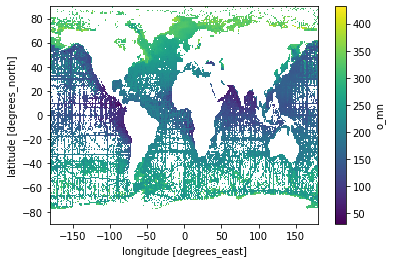

In [5]:
ds['o_mn'].mean(dim=['time','depth']).plot()

## World Ocean Data (WOD):

In [12]:
url_root = 'https://data.nodc.noaa.gov/thredds/dodsC/ncei/wod/'
year = 2018
file_name = '/wod_ctd_2018.nc'
ds2 = xr.open_dataset(url_root + str(year) + file_name, 
    decode_times=False)
ds2

<xarray.Dataset>
Dimensions:                         (casts: 22618, z_obs: 4129661, Temperature_obs: 4129636, Salinity_obs: 4089958, Oxygen_obs: 2566627, Chlorophyll_obs: 1604001, Pressure_obs: 3514144, Nitrate_obs: 17953, numberofpis: 140)
Coordinates:
    lat                             (casts) float32 ...
    lon                             (casts) float32 ...
    time                            (casts) float64 ...
    z                               (z_obs) float32 ...
Dimensions without coordinates: casts, z_obs, Temperature_obs, Salinity_obs, Oxygen_obs, Chlorophyll_obs, Pressure_obs, Nitrate_obs, numberofpis
Data variables: (12/75)
    country                         (casts) |S64 ...
    WOD_cruise_identifier           (casts) |S64 ...
    originators_cruise_identifier   (casts) |S64 ...
    wod_unique_cast                 (casts) int32 ...
    originators_station_identifier  (casts) |S64 ...
    date                            (casts) int32 ...
    ...                              ...
    Nitrate_WODprofileflag          (casts) int8 ...
    Nitrate_contains_nitrite        (casts) |S64 ...
    Primary_Investigator            (numberofpis) |S64 ...
    Primary_Investigator_VAR        (numberofpis) |S64 ...
    Primary_Investigator_row_size   (casts) float64 ...
    crs                             int32 ...
Attributes: (12/40)
    institution:                   National Centers for Environmental Informa...
    source:                        World Ocean Database
    references:                    World Ocean Database 2018. URL:http://data...
    title:                         World Ocean Database - Multi-cast file
    summary:                       Data for multiple casts from the World Oce...
    id:                            /nodc/data/OCLAB/OCL/retrieval/monthlies/w...
    ...                            ...
    standard_name_vocabulary:      CF Standard Name Table v41
    featureType:                   Profile
    cdm_data_type:                 Profile
    Conventions:                   CF-1.6
    DODS.strlen:                   40
    DODS.dimName:                  strnlensmall

In [18]:
for x in ds2.keys():
    if 'Oxygen' in x:
        print(x, ds2[x].values.shape)
        
for x in ['lat', 'lon', 'time', 'z']:
    print(x, ds2[x].values.shape)

Oxygen (2566627,)
Oxygen_sigfigs (2566627,)
Oxygen_row_size (22618,)
Oxygen_WODflag (2566627,)
Oxygen_origflag (2566627,)
Oxygen_WODprofileflag (22618,)
Oxygen_Instrument (22618,)
Oxygen_Original_units (22618,)
lat (22618,)
lon (22618,)
time (22618,)
z (4129661,)


In [61]:
file_name = '/wod_pfl_2018.nc'
ds3 = xr.open_dataset(url_root + str(year) + file_name, 
    decode_times=False)
ds3.dims

Frozen({'casts': 176676, 'z_obs': 88925764, 'Temperature_obs': 88925621, 'Salinity_obs': 88904913, 'Pressure_obs': 88925764, 'Oxygen_obs': 9280272, 'Nitrate_obs': 4130029, 'pH_obs': 2333143, 'Chlorophyll_obs': 7991367, 'numberofpis': 205166})

In [62]:
for x in ds3.keys():
    if 'Oxygen' in x:
        print(x, ds3[x].values.shape)
        
for x in ['lat', 'lon', 'time', 'z']:
    print(x, ds3[x].values.shape)

Oxygen (9280272,)
Oxygen_sigfigs (9280272,)
Oxygen_row_size (176676,)
Oxygen_WODflag (9280272,)
Oxygen_origflag (9280272,)
Oxygen_WODprofileflag (176676,)
Oxygen_Adjustment (176676,)
Oxygen_prime_min_dep (176676,)
lat (176676,)
lon (176676,)
time (176676,)
z (88925764,)


### WOD types of data: 
- xbt: temperature
- pfl: similar to ctd, but more data, still MISMATCH dimension
- osd: CTD + Ox + trace (alkalinity, isotope) + wind, usually available for old data
- mrb: CTD
- gld: CTD with Ox
- drb: CTD with Ox
- ctd: CTD with Ox
- apb: CTD 

Ocean Station
Data – OSD; High-resolution Conductivity-Temperature-Depth – CTD; Mechanical/ Digital/ Micro
Bathythermograph – MBT; Expendable Bathythermograph – XBT; Surface – SUR; Autonomous
Pinniped Bathythermograph – APB; Moored Buoy – MRB; Profiling Float – PFL; Drifting Buoy –DRB; 
Undulating Oceanographic Recorder – UOR; and Glider – GLD. In the remainder of this
document, the following terms OSD, CTD, MBT, XBT, SUR, APB, MRB, PFL, DRB, UOR, and
GLD are used. 

Data description: https://www.ncei.noaa.gov/sites/default/files/2020-04/wodreadme_0.pdf 

Mabye Oxygen is the result of the removing flagged data -> False


In [47]:
ds3['Oxygen'].values

array([206.386, 206.673, 206.976, ...,     nan,     nan,     nan],
      dtype=float32)

In [60]:
ds_in = ds2
doxy = ds_in.Oxygen[ds_in.Oxygen_WODflag == 0]
z = ds_in.z[ds_in.Oxygen_WODflag == 0]

IndexError: Boolean array size 2566627 is used to index array with shape (4129661,).